In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver

#이 부분을 수정한다. 
driver = set_chrome_driver()

In [22]:
url = 'https://www.naver.com'
driver.get(url)

In [23]:
html = driver.page_source 

In [24]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

from bs4 import BeautifulSoup 

soup = BeautifulSoup(html, 'html.parser') 

In [25]:
#태그명으로 찾기
tags_span = soup.select('span')
tags_p = soup.select('p')


In [26]:
#id와 class로 찾기
# #뒤에 id를 입력해서 찾거나 .뒤에 class를 넣는 방법이 있다. 
ids_fruits1 = soup.select('#fruits1')
class_price = soup.select('.price')
#태그가 span이면서 class명이 price인 것을 모두 찾는다. 
tags_span_class_price = soup.select('span.price')
tags_span_class_price

[<span class="price"> 3000원 </span>]

In [27]:
#상위 구조 활용
#정보가 담긴 태그의 속성만으로는 찾기가 어려울 경우 부모 태그 아래에 있는지 등의 정보를 추가해서 찾을 수 있다.
#한단계 아래를 의미할 때는 '>'기호를 사용한다. 
#상위 태그는 부모태그, 하위 태그는 자식 태그라고 부른다. 
tags_name = soup.select('span.name')
tags_name 

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [28]:
#이때 파인애플은 제외하고 바나나만 찾기 위해 바나나가 속한 부모 태그 정보를 추가한다. 
#부모 태그를 추가하면 바나나만 출력된다.
tags_banana1 = soup.select('#fruits1 > span.name')
tags_banana1

[<span class="name"> 바나나 </span>]

In [29]:
#태그 위치로 위치 찾기2 
#결과는 동일하지만 첫번째 코드는 상위태그1(div.sale)바로 아래에 있는 상위 태그2(#fruits1)을 찾고,
#상위태그2(#fruits1) 바로 아래에 있는 태그(span.name)을 모두 찾았다. 
#두번째 코드는 상위태그(div.sale) 바로 아래에 있는 태그뿐 아니라 몇 단계 아래의 태그 중에서 태그 정보(span.name)
#을 모두 찾았다. 
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
tags_banana3 = soup.select('div.sale span.name')
print(tags_banana2)
print(tags_banana3)


[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


In [30]:
#태그 그룹에서 하나의 태그만 선택
tags = soup.select('span.name')
tag_1 = tags[0]
tag_1

<span class="name"> 바나나 </span>

In [31]:
tags = soup.select('span.name')
for tag in tags:
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


In [32]:
#선택한 태그에서 텍스트, 속성값 가져오기
tags = soup.select('a')
tag = tags[0]
content = tag.text 
content 
link = tag['href']
link 

'http://bit.ly/forPlaywithData'

In [33]:
#멜론 노래 순위 정보 크롤링
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver

#이 부분을 수정한다. 
driver = set_chrome_driver()

url = 'https://www.melon.com/chart/index.htm'
driver.get(url)


In [34]:
#첫번째 줄에서 table > tbody > tr을 통해 곡 정보가 포함된 tr태그를 모두 찾았다. 
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
songs = soup.select('table > tbody > tr')
print(len(songs))
print(songs[0])

100
<tr class="lst50" data-song-no="34819473" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="사건의 지평선 곡 선택" type="checkbox" value="34819473"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10903868');" title="YOUNHA 6th Album Repackage 'END THEORY : Final Edition'">
<img alt="YOUNHA 6th Album Repackage 'END THEORY : Final Edition' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/109/03/868/10903868_20220330103544_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>


In [35]:
#곡 제목찾기
#조건에 만족하는 곡의 갯수가 6개
song = songs[0]
title = song.select('a')
len(title)


6

In [36]:
#곡 제목찾기2
title = song.select('span > a')
len(title)

2

In [37]:
#곡 제목찾기3
title = song.select('div.ellipsis.rank01 > span > a')
len(title)

1

In [38]:
#곡 제목 가져오기
title = song.select('div.ellipsis.rank01 > span > a')[0].text 
title

'사건의 지평선'

In [39]:
#가수 정보 가져오기
singer = song.select('div.ellipsis.rank02 > a')[0].text 
singer

'윤하 (YOUNHA)'

In [40]:
#이번에는 100곡의 노래순위 정보 가져오기
for song in songs:
    title = song.select('div.ellipsis.rank01 > span >a')[0].text 
    singer = song.select('div.ellipsis.rank02 > a')[0].text 
    print(title, singer, sep = "|")

사건의 지평선|윤하 (YOUNHA)
Nxde|(여자)아이들
ANTIFRAGILE|LE SSERAFIM (르세라핌)
Hype boy|NewJeans
After LIKE|IVE (아이브)
새삥 (Prod. ZICO) (Feat. 호미들)|지코 (ZICO)
사랑은 늘 도망가|임영웅
Rush Hour (Feat. j-hope of BTS)|Crush
우리들의 블루스|임영웅
London Boy|임영웅
Attention|NewJeans
Polaroid|임영웅
다시 만날 수 있을까|임영웅
Monologue|테이
무지개|임영웅
이제 나만 믿어요|임영웅
아버지|임영웅
Shut Down|BLACKPINK
LOVE DIVE|IVE (아이브)
A bientot|임영웅
손이 참 곱던 그대|임영웅
인생찬가|임영웅
사랑해 진짜|임영웅
연애편지|임영웅
자격지심 (Feat. ZICO)|BE'O (비오)
Pink Venom|BLACKPINK
보금자리|임영웅
딱 10CM만|10CM
해요 (2022)|#안녕
그때 그 순간 그대로 (그그그)|WSG워너비 (가야G)
우린 그렇게 사랑해서|강민경 (다비치)
TOMBOY|(여자)아이들
그라데이션|10CM
내가 아니라도|주호
사랑인가 봐|멜로망스
Cookie|NewJeans
너의 모든 순간|성시경
떠나보낼 준비해 둘걸 그랬어|임한별
보고싶었어|WSG워너비 (4FIRE)
FEARLESS|LE SSERAFIM (르세라핌)
정이라고 하자 (Feat. 10CM)|BIG Naughty (서동현)
나의 X에게|경서
That That (prod. & feat. SUGA of BTS)|싸이 (PSY)
ELEVEN|IVE (아이브)
취중고백|김민석 (멜로망스)
다정히 내 이름을 부르면|경서예지
고백연습|경서
That's Hilarious|Charlie Puth
내 기쁨은 너가 벤틀리를 끄는 거야|김승민
FOREVER 1|소녀시대 (GIRLS' GENERATION)
The Astronaut|진
Dynamite|방탄소년단
주저하는 연인들을 위해|잔나비
LOVE me|BE'O

In [41]:
#selenium을 활용한 크롤링
#selenium을 사용하면 웹 페이지에 계속 접속한 상태로 정보를 가져온다는 특징이 있다. 
#이 부분을 수정한다. 
driver = set_chrome_driver()

url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

songs = driver.find_elements_by_css_selector('table > tbody > tr')
for song in songs: 
    title = song.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text 
    singer = song.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text 
    print(title, singer, sep="||")

AttributeError: 'WebDriver' object has no attribute 'find_elements_by_css_selector'

In [ ]:
#멜론 크롤링 결과를 엑셀로 저장하기 

url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
#반복문을 이용해 곡과 가수명을 song_data에 저장하기
song_data = []
rank = 1 
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select('div.rank01 > span > a')[0].text 
    singer = song.select('div.rank02 > a')[0].text 
    song_data.append(['Melon',rank,title,singer])
    rank = rank + 1 



In [ ]:
#이렇게 수집된 데이터를 데이터프레임으로 만든다.
import pandas as pd 
columns = ['서비스','순위','타이틀','가수']
pd_data = pd.DataFrame(song_data, columns=columns)
pd_data.head()

,서비스,순위,타이틀,가수
0,Melon,1,사건의 지평선,윤하 (YOUNHA)
1,Melon,2,Nxde,(여자)아이들
2,Melon,3,ANTIFRAGILE,LE SSERAFIM (르세라핌)
3,Melon,4,Hype boy,NewJeans
4,Melon,5,After LIKE,IVE (아이브)


In [ ]:
#크롤링 결과를 엑셀로 저장하기
pd_data.to_excel('c:\work\melon.xlsx', index=False)

In [ ]:
#벅스 크롤링 결과를 엑셀에 저장하기

url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
#tr태그로 곡 정보 찾기1
songs = soup.select('tr')
print(len(songs))

104


In [ ]:
#tr태그로 곡 정보 찾기 2 
songs = soup.select('tbody > tr')
print(len(songs))

103


In [ ]:
#이번에는 table태그에 있는 byChart라는 class이름을 지정해 출력해 본다. 
songs = soup.select('table.byChart > tbody > tr')
print(len(songs))

100


In [ ]:
print(songs[0])

<tr albumid="4080705" artistid="20056456" multiartist="N" mvid="612174" rowtype="track" trackid="6179174">
<input name="_isStream" type="hidden" value="6179174"/>
<input name="_isDown" type="hidden" value="6179174"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="Nxde" type="checkbox" value="6179174"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/4080705?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="I love 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/40807/4080705.jpg?version=20221020022905.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/6179174?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog

In [ ]:
#한개의 곡 정보 지정하기
song = songs[0]
#벅스 사이트에서 곡 제목 찾기1
title = song.select('a')
len(title)

11

In [ ]:
title = song.select('p > a')
len(title)


[<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6179174',true);
 " title="Nxde">Nxde</a>,
 <a href="https://music.bugs.co.kr/artist/20056456?wl_ref=list_tr_10_chart" onclick="
 " title="(여자)아이들">(여자)아이들</a>]

In [ ]:
#벅스 사이트에서 곡 제목 찾기3
title = song.select('p.title > a')
len(title)

1

In [ ]:
#벅스 사이트에서 곡 제목 출력하기
title = song.select('p.title > a')[0].text 
title

'Nxde'

In [ ]:
#가수 이름 출력하기
singer = song.select('p.artist > a')[0].text.strip()
singer

'(여자)아이들'

In [ ]:
#벅스 100위 노래 순위 가져오기
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text 
    singer = song.select('p.artist > a')[0].text 
    print(title, singer, sep="|")

Nxde|(여자)아이들
ANTIFRAGILE|LE SSERAFIM (르세라핌)
사건의 지평선|윤하(Younha/ユンナ)
Hype Boy|NewJeans
After LIKE|IVE (아이브)
Youth|기현
새삥 (Prod. ZICO) (Feat. 호미들)|지코
Shut Down|BLACKPINK
Attention|NewJeans
Rush Hour (Feat. j-hope of BTS)|Crush
LOVE DIVE|IVE (아이브)
자격지심 (Feat. ZICO)|BE'O (비오)
Monologue|테이(Tei)
진심이었던 사람만 바보가 돼|권진아
우린 그렇게 사랑해서|강민경
Pink Venom|BLACKPINK
딱 10CM만|10CM
Bad Liar|기현
STARDUST|기현
I Don’t Think That I Like Her|Charlie Puth(찰리 푸스)
Where Is This Love|기현
'Cause of You|기현
파노라마|이찬혁
ILLELLA (일낼라)|마마무(Mamamoo)
Loveable|조유리
FEARLESS|LE SSERAFIM (르세라핌)
Cookie|NewJeans
사랑아|KCM
TOMBOY|(여자)아이들
그때로 돌아가|로이킴
ELEVEN|IVE (아이브)
LOVE|(여자)아이들
주저하는 연인들을 위해|잔나비
Change|(여자)아이들
DICE|NMIXX
그라데이션|10CM
LAW (Prod. Czaer)|윤미래
내가 아니라도|주호
떠나보낼 준비해 둘걸 그랬어|임한별
사랑인가 봐|멜로망스(MeloMance)
Talk that Talk|TWICE (트와이스)
해요 (2022)|#안녕
When I Get Old|Christopher(크리스토퍼)
그래서 그대는|이영현
That's Hilarious|Charlie Puth(찰리 푸스)
정이라고 하자 (Feat. 10CM)|BIG Naughty (서동현)
불륜|비비(BIBI)
Anti-Hero|Taylor Swift(테일러 스위프트)
Dangerously|Charlie Puth(찰리 푸스)

In [ ]:
#반복문으로 곡과 가수명을 song_data에 저장하기
song_data = []
rank = 1 
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text 
    singer = song.select('p.artist > a')[0].text 
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1 

    

In [ ]:
#데이터프레임 만들기
import pandas as pd 
columns = ['서비스','순위','타이틀','가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   타이틀     100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [ ]:
#엑셀 파일로 저장
pd_data.to_excel('c:\\work\\bugs.xlsx', index=False)


In [ ]:
#지니 크롤링 결과를 엑셀로 저장하기 

url = 'https://www.genie.co.kr/chart/top200'
driver.get(url)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
songs = soup.select('table > tbody > tr')
print(len(songs))

50


In [ ]:
#지니 결과 엑셀로 저장하기
song_data = []
rank = 1 
songs = soup.select('tbody > tr')
for song in songs: 
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text 
    song_data.append(['Genie',rank,title,singer])
    rank = rank + 1 

columns = ['서비스','순위','타이틀','가수']
pd_data = pd.DataFrame(song_data, columns=columns)
pd_data.to_excel('c:\work\genie.xlsx', index=False)

In [ ]:
#멜론, 벅스, 지니 크롤링 엑셀 파일 통합하기 
import pandas as pd 
excel_names = ['c:\\work\\melon.xlsx','c:\\work\\bugs.xlsx','c:\\work\\genie.xlsx']
appended_data = pd.DataFrame()
for name in excel_names:
    pd_data = pd.read_excel(name)
    appended_data = appended_data.append(pd_data)

appended_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_14452\1225656103.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_data)
C:\Users\user\AppData\Local\Temp\ipykernel_14452\1225656103.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_data)
C:\Users\user\AppData\Local\Temp\ipykernel_14452\1225656103.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_data)


In [ ]:
#통합한 크롤링 결과를 엑셀 파일로 저장하기
appended_data.to_excel('c:\\work\\total.xlsx', index=False)


In [ ]:
#유튜브 랭킹 데이터 수집하기
from selenium import webdriver 
from bs4 import BeautifulSoup
import time 
import pandas as pd 

#이 부분을 수정한다. 
driver = set_chrome_driver()

url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
driver.get(url)


In [ ]:
#페이지 정보 가져오기
html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')


In [ ]:
#tr태그 추출하기
channel_list = soup.select('tr')
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [ ]:
#tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [ ]:
#채널 하나만 출력하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [ ]:
#카테코리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [ ]:
#채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [ ]:
#구독자수, View수, 동영상수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text 
view = channel.select('.view_cnt')[0].text 
video = channel.select('.video_cnt')[0].text 

print(subscriber)
print(view)
print(video)


8250만
275억1754만
443개


In [ ]:
#반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text 
    view = channel.select('.view_cnt')[0].text 
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 8250만 275억1754만 443개
BANGTANTV [음악/댄스/가수] 7130만 182억0250만 1,836개
HYBE LABELS [음악/댄스/가수] 6840만 248억8615만 1,017개
SMTOWN [음악/댄스/가수] 3100만 257억5405만 3,989개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
JYP Entertainment [음악/댄스/가수] 2590만 178억6866만 1,570개
1MILLION Dance Studio [음악/댄스/가수] 2570만 75억2000만 4,551개
1theK (원더케이) [음악/댄스/가수] 2430만 229억0076만 17,271개
Mnet K-POP [음악/댄스/가수] 1990만 135억5752만 29,418개
KBS WORLD TV [TV/방송] 1840만 141억9962만 59,759개
officialpsy [음악/댄스/가수] 1760만 100억6061만 121개
JFlaMusic [음악/댄스/가수] 1760만 36억9562만 290개
Jane ASMR 제인 [음식/요리/레시피] 1700만 67억0019만 1,622개
BIGBANG [음악/댄스/가수] 1490만 74억6334만 776개
TWICE [음악/댄스/가수] 1490만 40억9860만 934개
Boram Tube ToysReview [보람튜브 토이리뷰] [키즈/어린이] 1440만 49억3355만 579개
Hongyu ASMR 홍유 [음식/요리/레시피] 1410만 44억9779만 549개
BIBO와 장난감 [키즈/어린이] 1270만 29억7333만 161개
Kendrick Lamar [미분류] 1140만 50억0347만 20개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1100만 67억8078만 2,800개
Stray Kids [음악/댄스/가수] 1080만 22억8295만 664개
DuDuPopTOY [키즈/어린이] 1060만 49억2261만 2,2

IndexError: list index out of range

In [ ]:
#반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기 
results = []
for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    driver.get(url)
    time.sleep(2)
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text 
        video = channel.select('.video_cnt')[0].text 
        data = [title, category, subscriber, view, video]
        results.append(data)

In [ ]:
#엑셀에 저장
df = pd.DataFrame(results)
df.columns = ['title','category','subscriber','view','video']
df.to_excel('c:\\work\\youtube_rank.xlsx',index=False)

In [ ]:
#유튜브 랭킹 데이터 시각화 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
import platform 

if platform.system() == "Windows":
    path = 'c:\\Windows\\Fonts\\malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
elif platform.system() == "Darwin":
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')






In [ ]:
#엑셀 로딩 
df = pd.read_excel('c:\\work\\youtube_rank.xlsx')
df.head()


,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8250만,275억1754만,443개
1,BANGTANTV,[음악/댄스/가수],7130만,182억0250만,"1,836개"
2,HYBE LABELS,[음악/댄스/가수],6840만,248억8615만,"1,017개"
3,SMTOWN,[음악/댄스/가수],3100만,257억5405만,"3,989개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [ ]:
#데이터 살펴보기 
df['subscriber'][0:10]

0    8250만
1    7130만
2    6840만
3    3100만
4    2650만
5    2590만
6    2570만
7    2430만
8    1990만
9    1840만
Name: subscriber, dtype: object

In [ ]:
df['subscriber'].str.replace('만', '000')[0:10]

0    8250000
1    7130000
2    6840000
3    3100000
4    2650000
5    2590000
6    2570000
7    2430000
8    1990000
9    1840000
Name: subscriber, dtype: object

In [ ]:
#판다스에서 문자열을 다루는 다양한 함수를 제공한다. 
df['replaced_subscriber'] = df['subscriber'].str.replace('만','000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],8250만,275억1754만,443개,8250000
1,BANGTANTV,[음악/댄스/가수],7130만,182억0250만,"1,836개",7130000
2,HYBE LABELS,[음악/댄스/가수],6840만,248억8615만,"1,017개",6840000
3,SMTOWN,[음악/댄스/가수],3100만,257억5405만,"3,989개",3100000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,2650000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [ ]:
#replaced_subscriber의 데이터 형식이 int가 아닌 것을 볼 수 있다.
#astype()함수를 통해 변환한다. 
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [ ]:
#이제는 카테고리별 채널 수와 구독사 수를 파이차트로 시각화하기 위해 
#category.컬럼에서 개별 카테고리의 개수를 세어야 하고 replaced_subscriber컬럼에서
#카테고리별 구독자 수를 모두 더해야 한다. 
pivot_df = df.pivot_table(index = 'category', values='replaced_subscriber', aggfunc=['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],10640000,20
[TV/방송],89920000,120
[뉴스/정치/사회],21470000,30
[미분류],36220000,50
[애완/반려동물],4710000,10


In [ ]:
#결과에서 카테고리별 구독자 수와 채널 수를 확인할 수 있다. 이번에는 해당 컬럼을 알아보기 쉽게 변경한다. 
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()


,subscriber_sum,category_count
category,,
[BJ/인물/연예인],10640000,20
[TV/방송],89920000,120
[뉴스/정치/사회],21470000,30
[미분류],36220000,50
[애완/반려동물],4710000,10


In [ ]:
#각 컬럼명이 subscriber_sum과 category_count로 변경되었다. 하지만 각 컬럼은 데이터프레임에서 인덱스로 
#설정되어 있어서 reset_index()를 사용해서 인덱스를 초기화한다.
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],10640000,20
1,[TV/방송],89920000,120
2,[뉴스/정치/사회],21470000,30
3,[미분류],36220000,50
4,[애완/반려동물],4710000,10


In [ ]:
#데이터프레임을 내림차순 정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
6,[음악/댄스/가수],583540000,360
7,[키즈/어린이],203710000,240
5,[음식/요리/레시피],103000000,130
1,[TV/방송],89920000,120
3,[미분류],36220000,50


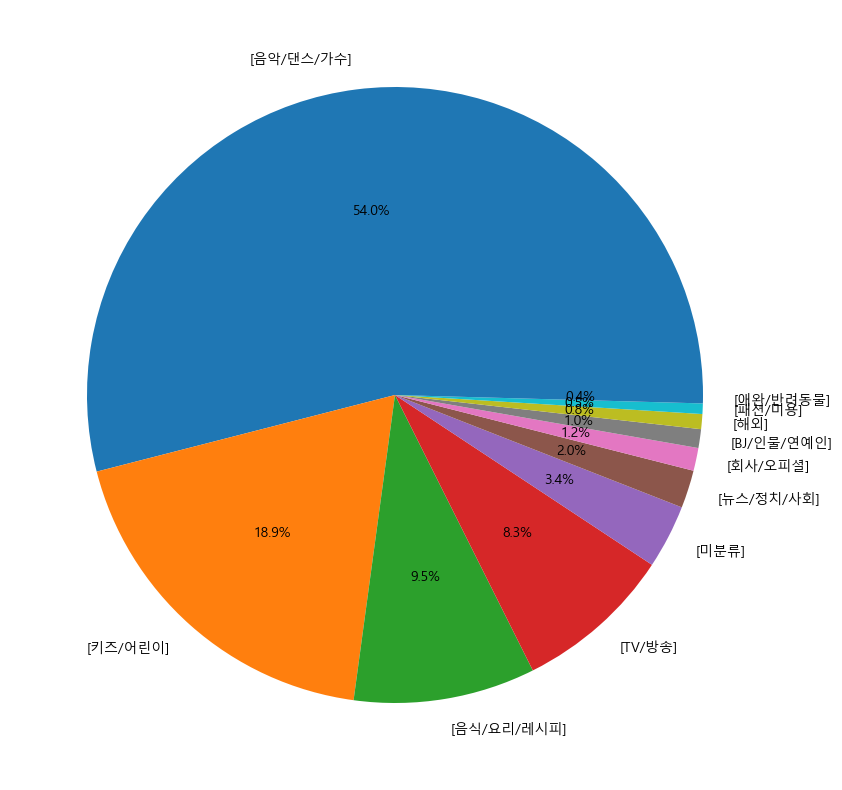

In [ ]:
#파이차트 그리기
#구독자수를 시각화하기 때문에 pivot_df['subscriber_sum]을 입력한다. 
#그리고 라벨을 출력하고 각 수치값을 퍼센트로 표기한다. 
plt.figure(figsize=(30,10))
plt.pie(pivot_df['subscriber_sum'], 
    labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

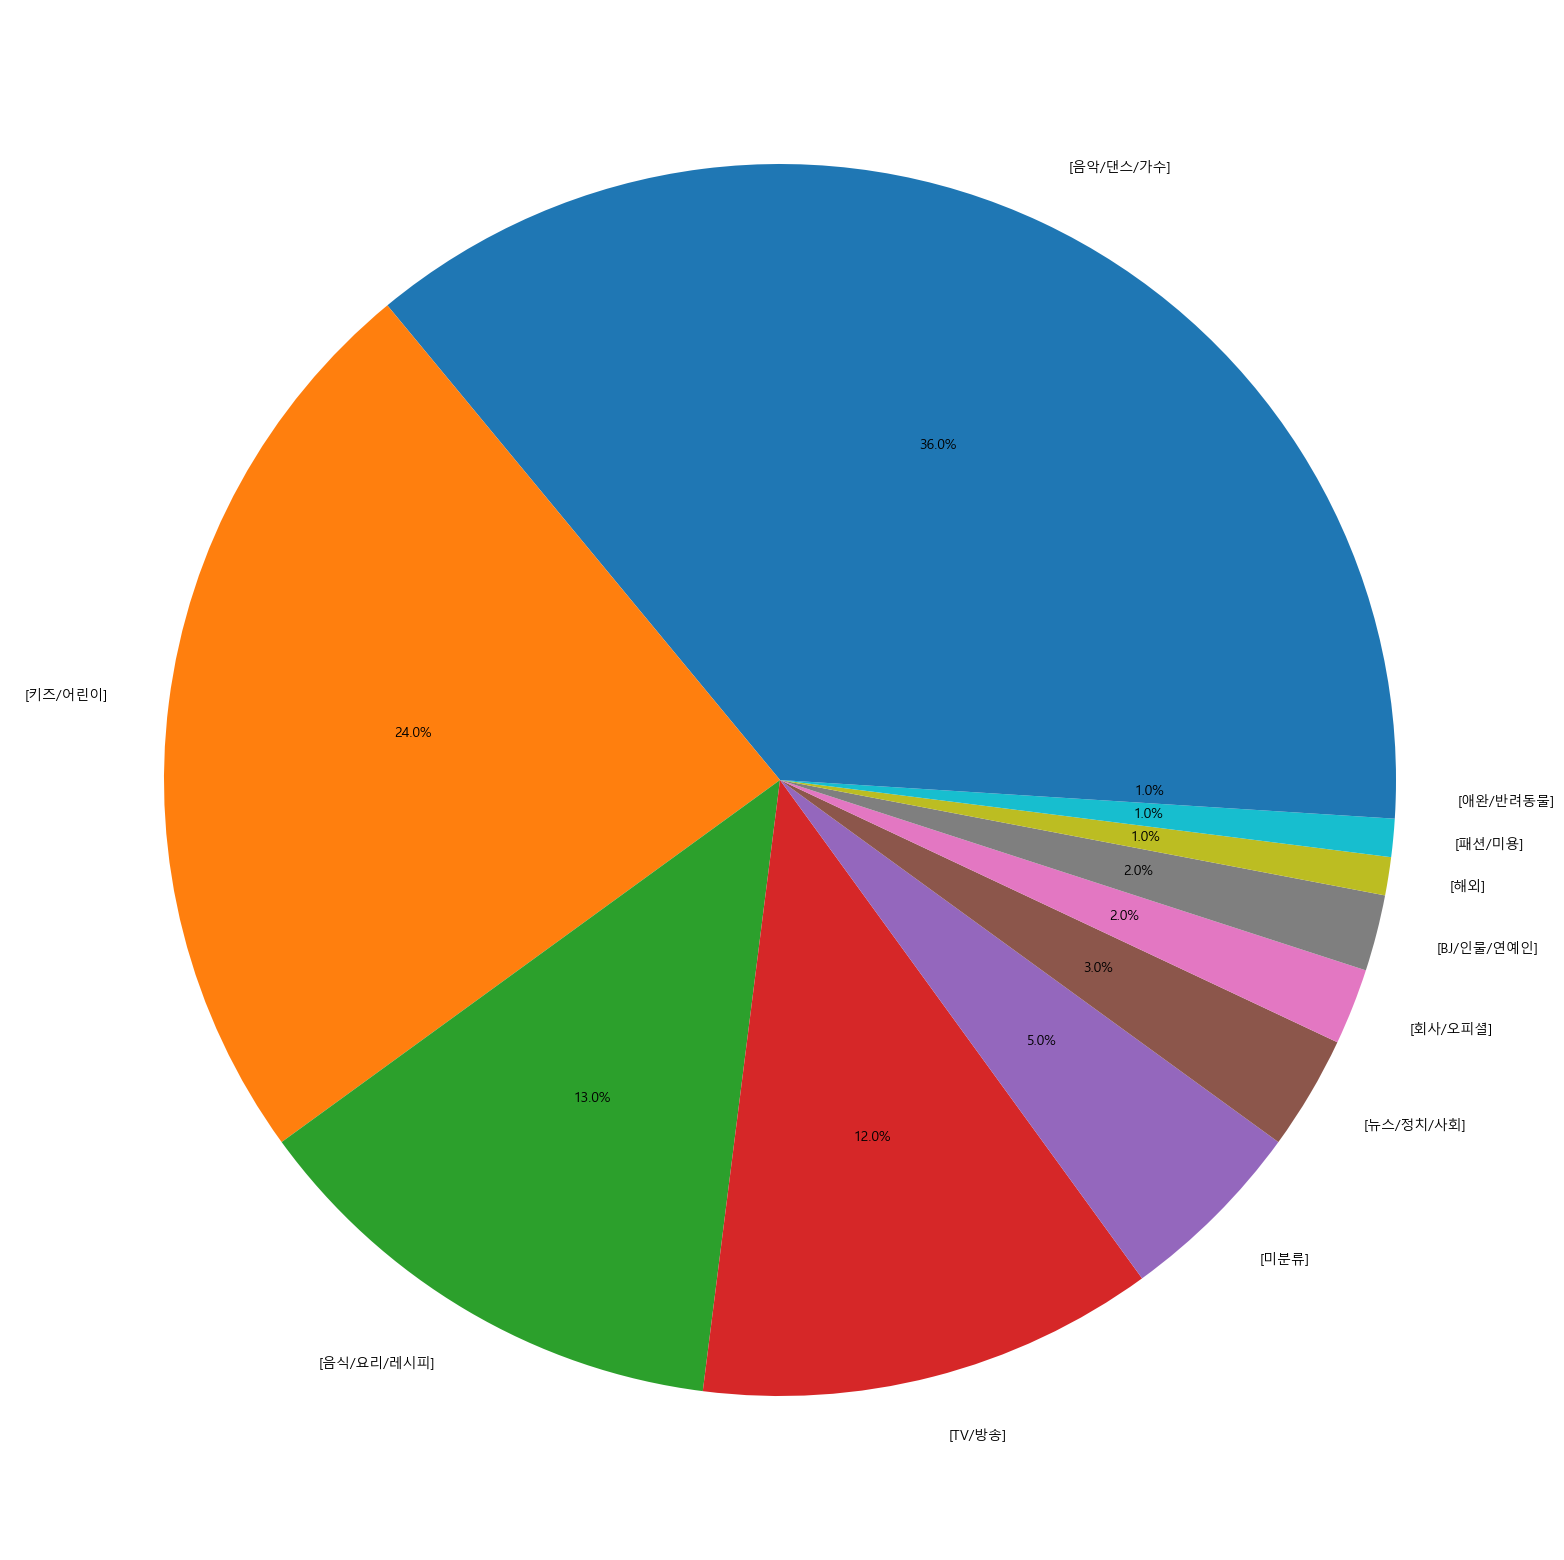

In [ ]:
#이번에는 카테고리 채널 수를 시각화한다. 
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize=(60,20))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], 
autopct='%1.1f%%')
plt.show()